<a href="https://colab.research.google.com/github/cabamarcos/SuperMask/blob/main/MNIST_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.datasets import mnist

import os


In [15]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


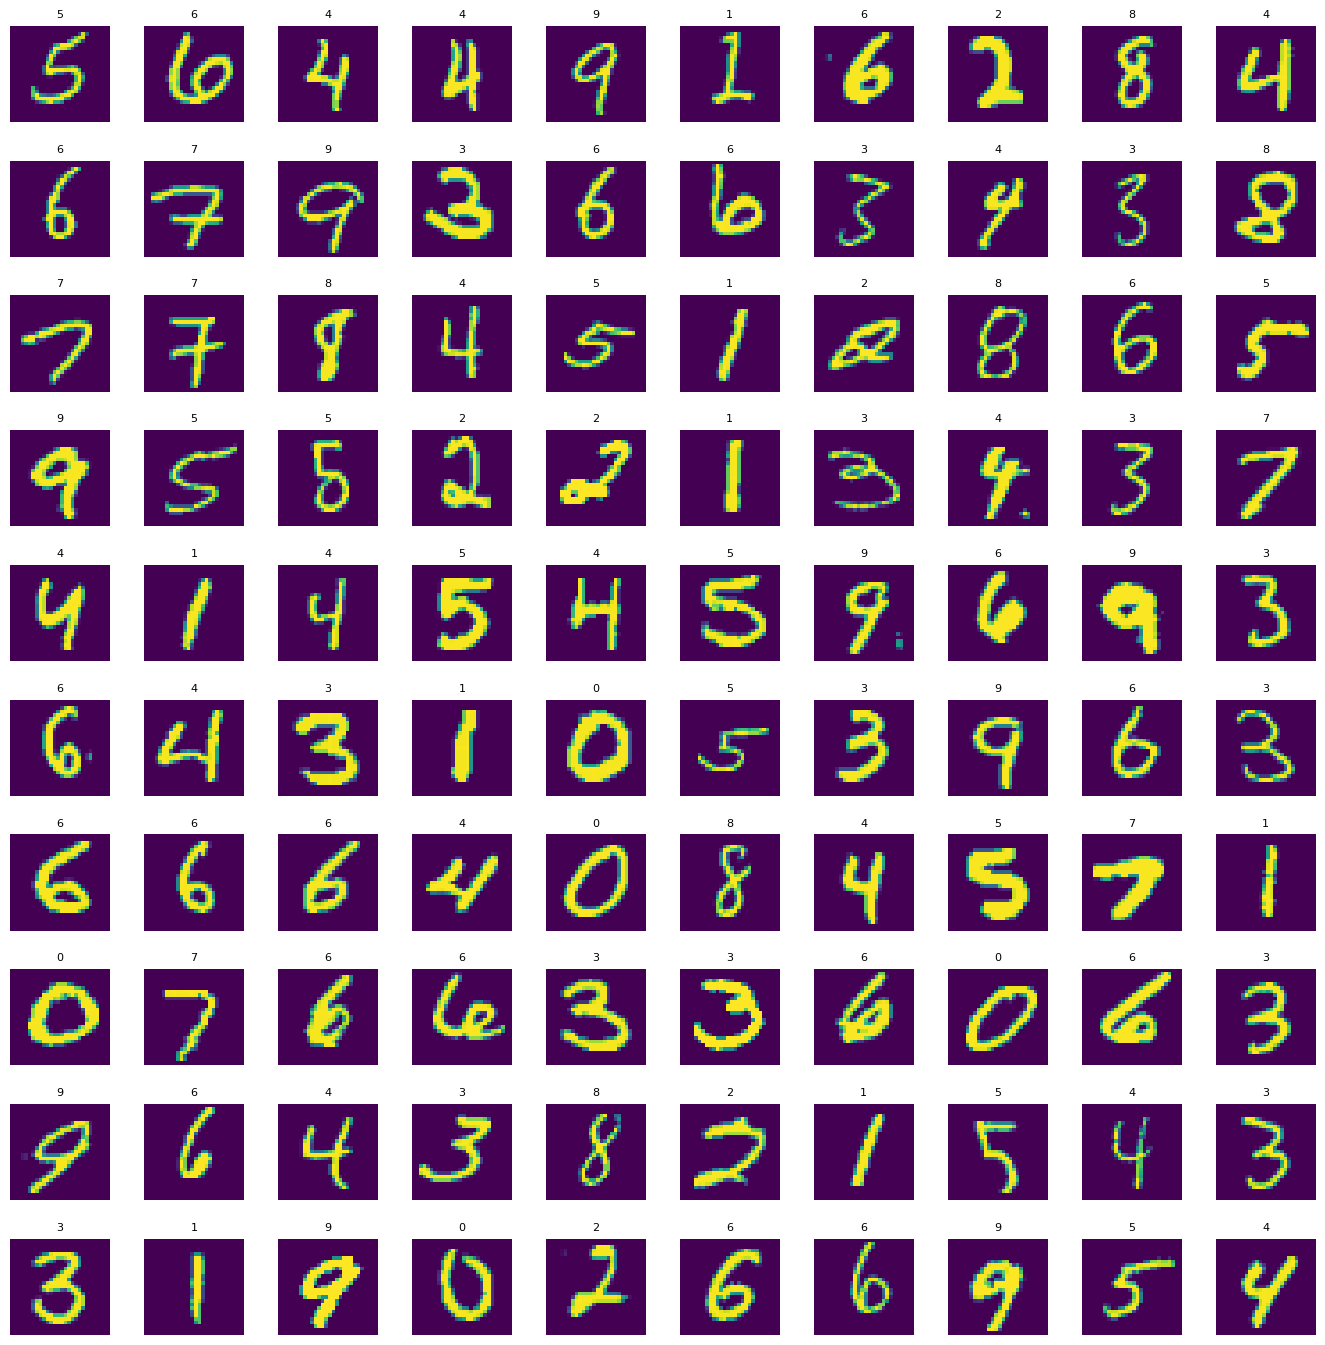

In [16]:
# Define the labels of the dataset
labels = ['0', '1', '2', '3', '4',
          '5', '6', '7', '8', '9']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

<BarContainer object of 10 artists>

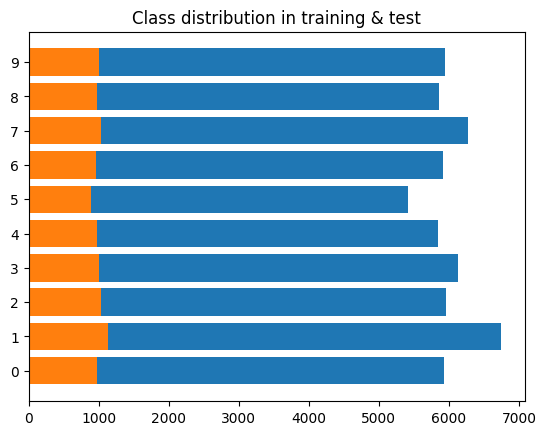

In [17]:
classes_name =['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training & test')

classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)


In [18]:
# Applying Data Augmentation

datagen = ImageDataGenerator(rotation_range=10,  zoom_range = 0.1,  width_shift_range=0.1,  height_shift_range=0.1)
# datagen.fit(X)

In [19]:
# An empty list to store the ensemble of 10 CNNs

model_list = []

In [20]:
# Learning rate annealer

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                patience=3,
                                verbose=1,
                                factor=0.2,
                                min_lr=1e-6)

In [21]:
# Creating 7 objects of the same CNN architecture and saving in model_list

for i in range(7):
    model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = [28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')])

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])
    model_list.append(model)

In [22]:
# Verifying the hashcodes

model_list

In [23]:
X_train = X_train.reshape((60000, 28, 28, 1))


In [24]:
# Training all the 7 CNNs in the ensemble together

history = [0] * 7

for i in range(7):
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.08)
    history[i] = model_list[i].fit_generator(datagen.flow(X_train, y_train, batch_size = 64),
                                             epochs = 20, validation_data = (X_valid, y_valid), callbacks = [reduce_lr])
    print("CNN : {} Maximum Train Accuracy : {} Maximum Validation Accuracy : {}".format(i+1, max(history[i].history['accuracy']), max(history[i].history['val_accuracy'])))

Epoch 1/20


<ipython-input-24-4f9c270277a8>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history[i] = model_list[i].fit_generator(datagen.flow(X_train, y_train, batch_size = 64),


863/863 [==============================] - 338s 382ms/step - loss: 0.3201 - accuracy: 0.9000 - val_loss: 0.1270 - val_accuracy: 0.9608 - lr: 0.0010
Epoch 2/20
863/863 [==============================] - 325s 377ms/step - loss: 0.1111 - accuracy: 0.9678 - val_loss: 0.1169 - val_accuracy: 0.9673 - lr: 0.0010
Epoch 3/20
863/863 [==============================] - 324s 375ms/step - loss: 0.0878 - accuracy: 0.9744 - val_loss: 0.0455 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 4/20
863/863 [==============================] - 325s 377ms/step - loss: 0.0752 - accuracy: 0.9779 - val_loss: 0.0435 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 5/20
863/863 [==============================] - 327s 379ms/step - loss: 0.0661 - accuracy: 0.9805 - val_loss: 0.0383 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 6/20
863/863 [==============================] - 326s 378ms/step - loss: 0.0619 - accuracy: 0.9828 - val_loss: 0.0366 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 7/20
863/863 [==============================] - 324

KeyboardInterrupt: 